In [ ]:
import numpy as np
import matplotlib.pyplot as plt

: 

In [11]:
# Necessary when connecting to a jupyterhub kernel running on daint via VScode. NOT required otherwise

import os

new_path = '/users/ajayaraj/scratch/tests/BLG/'
os.chdir(new_path)


In [14]:
from pathlib import Path


Path("./").absolute()

PosixPath('/scratch/snx3000/ajayaraj/tests/BLG')

In [15]:
def split_data_by_bands(filename):
    bands = []
    current_band_data = []

    with open(filename, 'r') as file:
        next(file)

        for line in file:
            if line.strip():  # Check if the line is not empty
                data = line.split()
                current_band_data.append([float(val) for val in data])
            else:
                bands.append(current_band_data)
                current_band_data = []

        if current_band_data:
            bands.append(current_band_data)

    return np.array(bands)

/tmp/ipykernel_62531/159569790.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


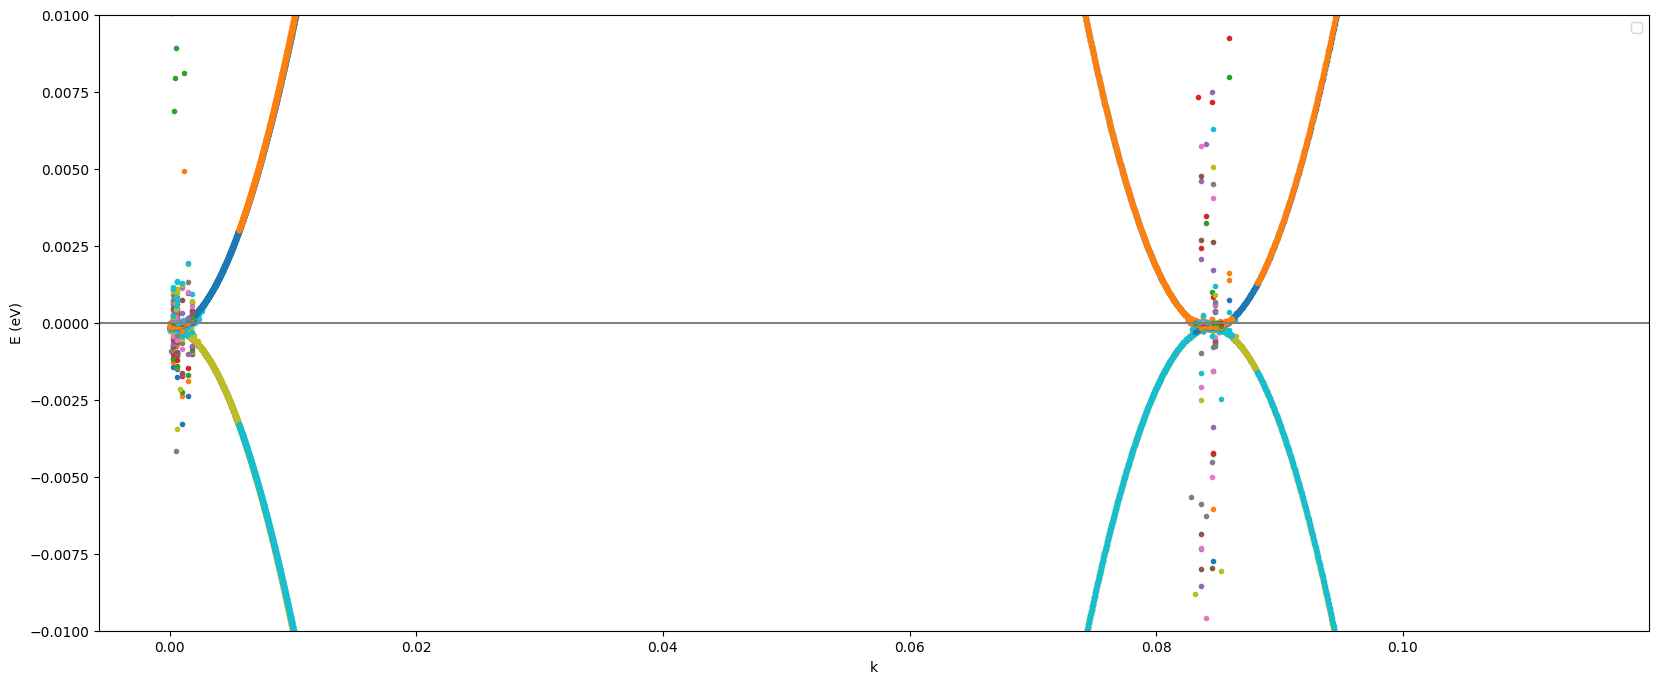

In [17]:
xtics =  [    0.00000,    0.85137,    1.27707,    1.29243,    2.56950,    2.58486,    3.86202]
xlabels = ["G","P","X","W","Y","G","W"]
file = f"./bulkek_not_flat.dat"
plt.figure(figsize=(20,8))
bands = split_data_by_bands(file)
klen = bands[19][:,3]
for band_index in range(10,30):
    band = bands[band_index][:,4]
    plt.plot(klen,band,'.')#,label=f"V = {potential} eV")
plt.ylim(-0.01,0.01)
# plt.xlim(0.2,0.6)
plt.ylabel("E (eV)")
plt.xlabel("k")
plt.axhline(0, color='gray', linewidth=1.5)
# plt.xticks(labels=xlabels,ticks=xtics)
plt.legend()
plt.show()

In [26]:
file = f"./bulkek_not_flat.dat"
plt.figure(figsize=(20,8))
bands = split_data_by_bands(file)
extract_index = 24
klen = bands[extract_index][:,3]
band_not_flat = bands[extract_index][:,4]


<Figure size 2000x800 with 0 Axes>

/tmp/ipykernel_62531/1490261490.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


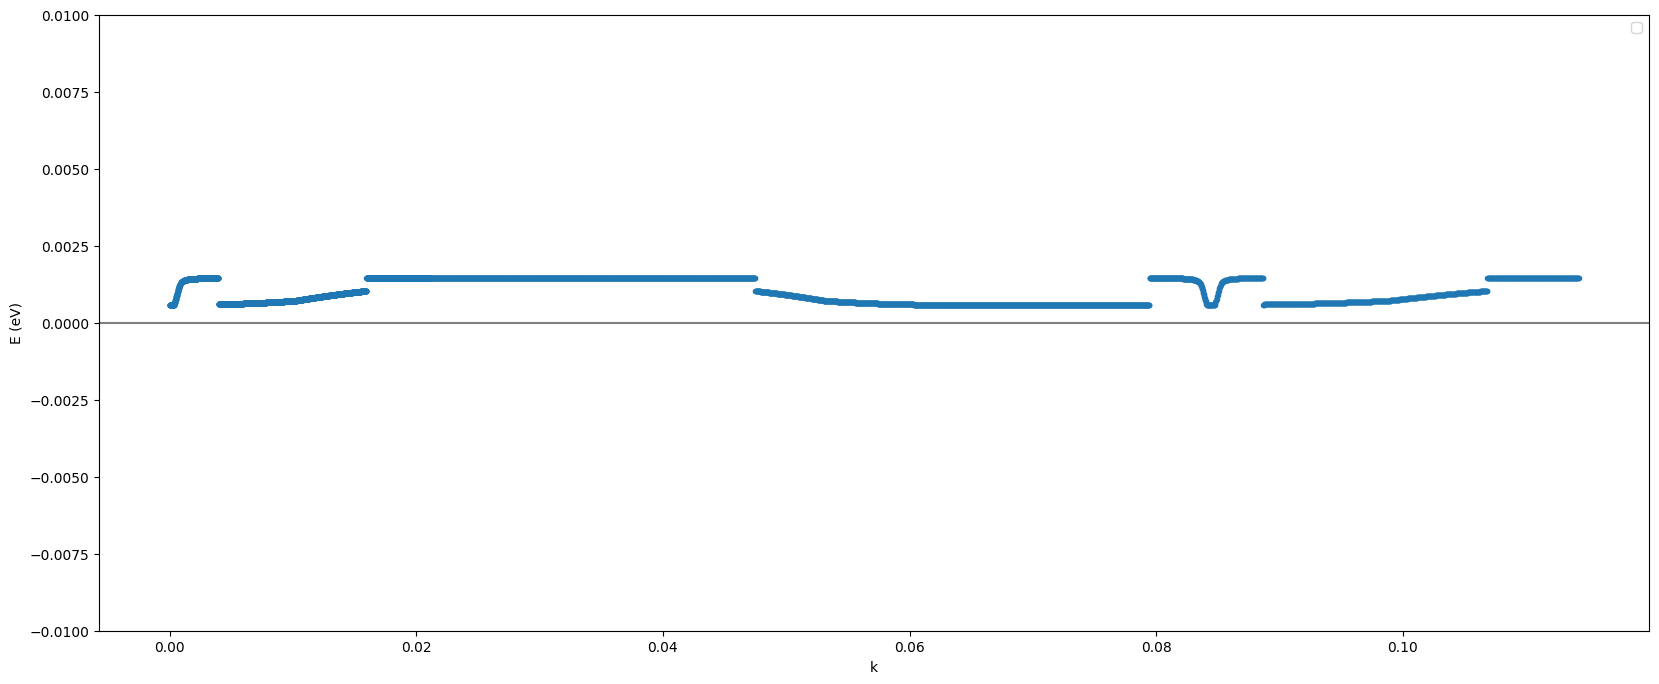

In [22]:
file = f"./bulkek_flat.dat"
plt.figure(figsize=(20,8))
bands = split_data_by_bands(file)
extract_index = 24
klen = bands[extract_index][:,3]
band = bands[extract_index][:,4]
plt.plot(klen,band,'.')
plt.ylim(-0.01,0.01)
# plt.xlim(0.2,0.6)
plt.ylabel("E (eV)")
plt.xlabel("k")
plt.axhline(0, color='gray', linewidth=1.5)
plt.legend()
plt.show()

In [25]:
import numpy as np

std_dev = np.std(band)
band_range = np.ptp(band)  # Range: max - min

print(f'Standard Deviation: {std_dev}')
print(f'Range: {band_range}')


Standard Deviation: 0.00038212172781782746
Range: 0.0008874969999999999


In [31]:
import numpy as np

std_dev = np.std(band_not_flat)
band_range = np.ptp(band_not_flat)  # Range: max - min

print(f'Standard Deviation: {std_dev}')
print(f'Range: {band_range}')


Standard Deviation: 0.022872098881024858
Range: 0.152950948


In [ ]:
import numpy as np

# Function to filter bands within a specific energy window
def filter_bands_in_energy_window(bands, lower_bound, upper_bound):
    filtered_bands = []
    for band in bands:
        energies = band[:, 4]  # Assuming the energy values are in the 5th column
        if np.any((energies >= lower_bound) & (energies <= upper_bound)):
            filtered_bands.append(band)
    return filtered_bands

# Define the energy window
lower_bound = -0.1
upper_bound = 0.1

# Split the data by bands
bands = split_data_by_bands(file)

# Filter the bands
filtered_bands = filter_bands_in_energy_window(bands, lower_bound, upper_bound)

# Output the filtered bands
print(f'Number of bands in the energy window [{lower_bound}, {upper_bound}]: {len(filtered_bands)}')

# If you need to visualize or further analyze these bands, you can proceed with the filtered_bands list
